### Analysis of an E-commerce Dataset

This project involves working with a combined e-commerce dataset that captures customer interactions with products. The dataset contains user-generated ratings and reviews for purchased items, along with feedback from other users who can express whether they find a review helpful or not.

The dataset provides a wide range of information about both users and products. User details include profile information such as ID, gender, and city of origin. Product-related data covers the item name, ID, price, category, and the ratings and reviews associated with it. Each rating entry also includes a timestamp and an average “helpfulness” score, reflecting how useful other users found the review.

The dataset has been consolidated from multiple sources into a single CSV file: A Combined E-commerce Dataset.csv. Its structure is outlined below:

| userId | gender | rating | review | item | category | helpfulness | timestamp | item_id | item_price | user_city |

#### Field Descriptions

* __userId – Unique identifier for each user

* __gender – Gender of the user

* __rating – Rating given by the user (1–5 scale)

* __review – Written feedback provided by the user

* __item – Name of the product

* __category – Category to which the product belongs

* __helpfulness – Average helpfulness score of the review (1–5 scale)

* __timestamp – Date and time when the review was posted

* __item_id – Unique identifier for each product

* __item_price – Price of the product

* __user_city – City associated with the user

Users may review multiple products, and products may receive feedback from many different users. The helpfulness score reflects the overall evaluation of a review by other users.

The dataset can be explored to answer various analytical questions, such as identifying user behavior patterns, product performance, and review dynamics.




 #### Part 1: Remove missing data

Remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

Display the DataFrame, counting number of Null values in each column, and print the length of the data before and after removing the missing data.  

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Read file
df= pd.read_csv('The E-commerce Dataset.csv')
#Length of original data
length_original=len(df.index)
print('Length of data before removing missing data is:'+str(length_original))

#List of column headers into an array
List_of_Column_names=df.columns
#For loop to print null values in each column
for column in List_of_Column_names:
  print('Number of null values in {} is {}'.format(column, str(df[column].isna().sum())))

#Remove missing records from gender,rating and helpfulness columns
count_nan_Dataframe=df.isna().sum().sum()
print('Number of null values in dataframe are ' + str(count_nan_Dataframe))
df = df.dropna(subset= ['gender', 'rating' , 'helpfulness'])

#Removing review column records with none datas
df=df[df["review"].str.contains("None|none")==False]

#Length of data after removing missing data
length_new=len(df.index)
print('Length of data after removing missing data is:'+str(length_new))
df

Length of data before removing missing data is:20000
Number of null values in userId is 0
Number of null values in timestamp is 0
Number of null values in review is 0
Number of null values in item is 0
Number of null values in rating is 17
Number of null values in helpfulness is 22
Number of null values in gender is 27
Number of null values in category is 0
Number of null values in item_id is 0
Number of null values in item_price is 0
Number of null values in user_city is 0
Number of null values in dataframe are 66
Length of data after removing missing data is:19912


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


#### Part 2: Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [ ]:
import numpy as np

print('Question 2.1\n')
array_of_Column_names =np.array(List_of_Column_names)

index=[1,4,5,6]
cols_list = np.delete(array_of_Column_names, index)

for values in cols_list[:4]:
  print('Number of unique values in {} is {}'.format(values, str(df[values].unique().size)))

print('\nQuestion 2.2\n')
#Descriptive statistics of all ratings records
print(df['rating'].describe())

total_ratings=df['rating'].sum()
print('The total number of rating records is '+ str(int(total_ratings)))

mean_ratings=df['rating'].mean()
print('The mean of rating records is '+str(round(mean_ratings,3)))

std_ratings=df['rating'].std()
print('The standard deviation of rating records is '+str(round(std_ratings,3)))

min_ratings=df['rating'].min()
print('The minimum rating record is '+str(min_ratings))

max_ratings=df['rating'].max()
print('The maximum rating record is '+str(max_ratings))

print('\nQuestion 2.3\n')
#The number of items rated by the different genders
count_items=df.groupby("gender").count()["item"]
print(count_items)

#Descriptive statistics of items rated by different genders
count_items.describe()

print('\nQuestion 2.4\n')
#Count of ratings received by different items
count_item_ratings=df.groupby("item").count()["rating"]

#Descriptive statistics of ratings received by different items
count_item_ratings.describe()

Question 2.1

Number of unique values in userId is 8561
Number of unique values in review is 19455
Number of unique values in item is 89
Number of unique values in category is 9

Question 2.2

count    19912.000000
mean         3.701637
std          1.404528
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64
The total number of rating records is 73707
The mean of rating records is 3.702
The standard deviation of rating records is 1.405
The minimum rating record is 1.0
The maximum rating record is 5.0

Question 2.3

gender
F     9792
M    10120
Name: item, dtype: int64

Question 2.4



count     89.000000
mean     223.730337
std      116.363729
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: rating, dtype: float64

#### Part 3 Plotting and Analysis

In this section, we will explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    

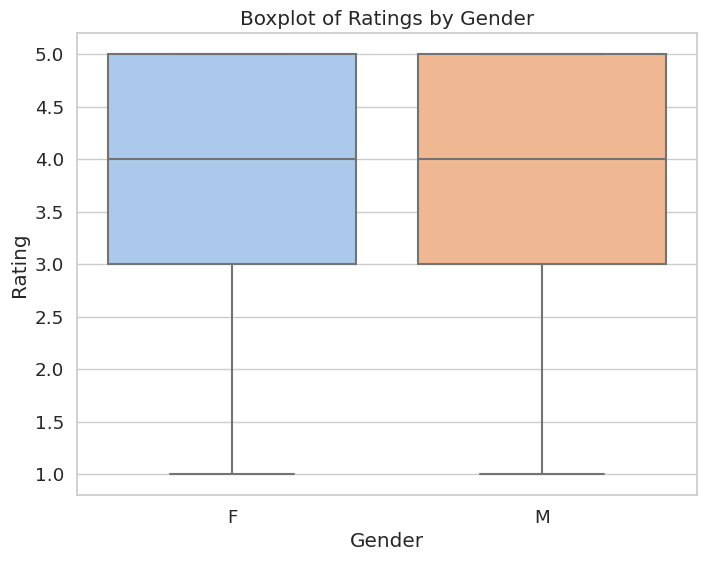

In [ ]:
# Set up the style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the boxplot
plt.figure(figsize=(8, 6))
plot1=sns.boxplot(x="gender", y="rating", data=df, palette="pastel")

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Rating")
plt.title("Boxplot of Ratings by Gender")
plt.show()







##### This plot shows the correlation between gender and ratings. Based on the boxplot the minimum and maximum rating for both genders is the same, furthermore, they also have the same median of 4.0 and the same upperquartile and lower quartile range of 5.0 and 3.0 respectively. This suggests that gender does not affect the level of rating for the items as both genders have the same median ratings and spread of ratings which in turn implies that gender may not have a strong impact on ratings

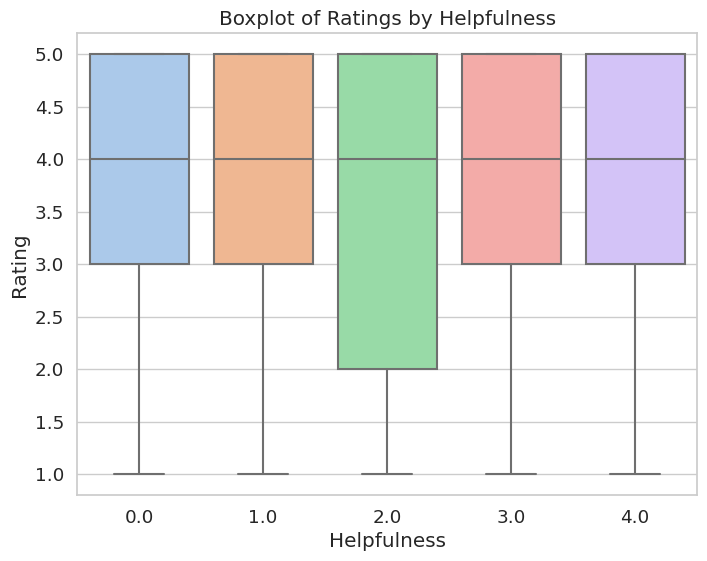

In [ ]:
plt.figure(figsize=(8, 6))
plot2=sns.boxplot(x="helpfulness", y="rating", data=df, palette="pastel")

# Add labels and title
plt.xlabel("Helpfulness")
plt.ylabel("Rating")
plt.title("Boxplot of Ratings by Helpfulness")
plt.show()


##### This plot shows the correlation between helpfulness and ratings. Based on the boxplot the minimum and maximum rating for all scales of helpfulness is the same, furthermore, they also have the same median of 4.0 and the same upper quartile and lower quartile range of 5.0 and 3.0 respectively.However, for helpfulness of 2.0 it has a lowerquartile of 2.0. This suggests that majority of the items that have received a helpfulness feedback of 2.0 have been rated low which implies that the rating of an item has a strong impact on the helpfulness feedback in the sense that majority of the lower rated items were not very helpful or were given an average score of 2.0.

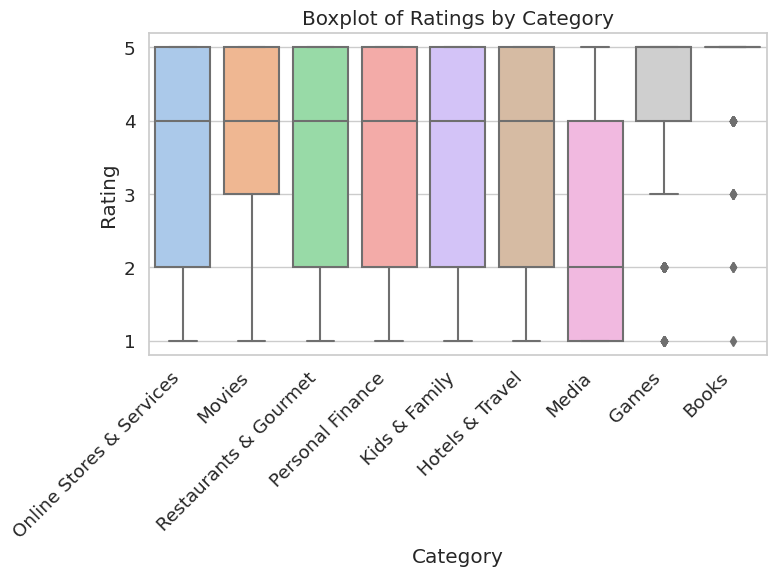

In [ ]:
plt.figure(figsize=(8, 6))
plot3=sns.boxplot(x="category", y="rating", data=df, palette="pastel")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Boxplot of Ratings by Category")


plt.tight_layout()  # Adjust spacing for labels and title
plt.show()

##### This boxplot shows the correlation between category of the items and ratings provided on them. Items which fall under the online stored & services, movies, restaurant & gourmet, personal finance, kids & family and hotels & travel category all have the same minimum and maximum ratings and also the same median. Items which fall in the media category have the lowest median of 2.0 and a lower interquartile range as compared to the other categories. Furthermore the items in the games category has a higher maximum and minimum rating range than the other categories and the spread of the middle 50% of its ratings lie between 4.0 and 5.0 rating. The books category may not have received much ratings as shown in the graph. This plot suggests that the correlation between category of items and ratings is strong as there is a different spread in the ratings for each category with items in the games category having been received the highest average ratings.

##### To summarise these datas we can say that category has a strong correlation with the ratings provied for the items as it has a wider spread between the boxplots and has more variability in ratings for items. Whereas gender and helpfulness may not have such a strong correlation with ratings as ther boxplots do not have much spread or differences in plots.

#### Part 4 Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings

In this section we will remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [25]:
#Reviews with more than 2 rating
clean_helpfulness_data=df.drop(df.index[df["helpfulness"]<=2])
clean_helpfulness_data

#Group users by id and counting their  ratings. Then separating the users who rated less than 7 items
count_user = clean_helpfulness_data.groupby("userId").count()["item"].reset_index(name = "count")
user_less_than7=count_user[count_user["count"]<7]["userId"].tolist()
#Dropping users who rate less than 7 items
clean_user_data = clean_helpfulness_data.drop(clean_helpfulness_data.index[clean_helpfulness_data["userId"].isin(user_less_than7)])

#Grouping data by unique items and count the ratings in the for each item
item_data_grouping = clean_user_data.groupby("item").count()["rating"]

#Filtering out items which have ratings of less than 11 and removing them
clean_item_data = clean_user_data.drop(clean_user_data.index[clean_user_data["item"].map(item_data_grouping) < 11])
